In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('4Combinations.csv')
df = df.sample(frac = 1) # Shuffle a Dataframe rows
df.head()

,FirstDisk,SecondDisk,ThirdDisk,FourthDisk,FirstRing,SecondRing,ThirdRing,5.00E+01,5.20E+01,5.40E+01,...,1.58E+03.3,1.58E+03.4,1.59E+03,1.59E+03.1,1.59E+03.2,1.59E+03.3,1.59E+03.4,1.60E+03,1.60E+03.1,1.60E+03.2
53,4,2,1,3,25,25,25,0.04940,0.0721,0.05210,...,0.1290,0.1280,0.1270,0.1290,0.129,0.1260,0.126,0.1260,0.1250,0.1250
20,4,3,2,1,10,10,10,0.02630,0.0320,0.00536,...,0.2000,0.2000,0.2000,0.2010,0.202,0.2010,0.201,0.2020,0.2020,0.2030
13,3,1,4,2,10,10,10,0.01500,0.0479,0.03270,...,0.0911,0.0906,0.0903,0.0914,0.092,0.0906,0.091,0.0915,0.0916,0.0917
11,2,4,3,1,10,10,10,0.00169,0.0232,0.03160,...,0.2010,0.1990,0.1960,0.1950,0.193,0.1900,0.187,0.1860,0.1840,0.1830
34,4,1,3,2,15,15,15,0.03070,0.0541,0.03780,...,0.2530,0.2500,0.2480,0.2480,0.247,0.2450,0.245,0.2440,0.2420,0.2400


In [3]:
# Specifying the X and Y
X_train=df.iloc[:,:7]
Y_train=df.iloc[:,7:]

# Splitting data into 70:30 train:test ratio
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=33)

In [4]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

0.16204096984466862

In [6]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

0.16204096984466862

In [7]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, test_preds)
rmse = sqrt(mse)
rmse

0.21966591346594197

In [17]:
parameters = {"n_neighbors": range(1, 5)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 5)})

In [18]:
gridsearch.best_params_

{'n_neighbors': 4}

In [19]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, train_preds_grid)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, test_preds_grid)
print("Train MSE is ",train_mse)
print("Train RMSE is ",train_rmse)
print("Train MAE is ", train_mae)

print("Test MSE is ",test_mse)
print("Test RMSE is ",test_rmse)
print("Tset MAE is ", test_mae)

Train MSE is  0.02888901887041146
Train RMSE is  0.16996769949143709
Train MAE is  0.12312705757665873
Test MSE is  0.04833545098834546
Test RMSE is  0.21985324875549478
Tset MAE is  0.15974565358319015


In [21]:
parameters = {"n_neighbors": range(1, 5), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)
GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 5),'weights': ['uniform', 'distance']})
print(gridsearch.best_params_)
{'n_neighbors': 25, 'weights': 'distance'}

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, test_preds_grid)
test_mape = mean_absolute_percentage_error(Y_test, test_preds_grid)
print("Test MSE is ", test_mse)
print("Test RMSE is ", test_rmse)
print("Test MAE is ", test_mae)
print("Test MAPE is ", test_mape)

{'n_neighbors': 4, 'weights': 'distance'}
Test MSE is  0.04564912629263401
Test RMSE is  0.2136565615482801
Test MAE is  0.15356396736998054
Test MAPE is  0.6265519306232907


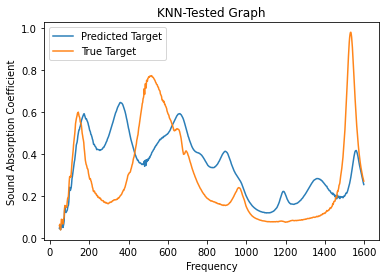

In [22]:
freq_range = range(48,1600,2)

plt.plot(freq_range, test_preds_grid[1], "-", alpha=14,label="Predicted Target")
plt.plot(freq_range, Y_test.iloc[1], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.legend()
plt.title("KNN-Tested Graph")
plt.show()

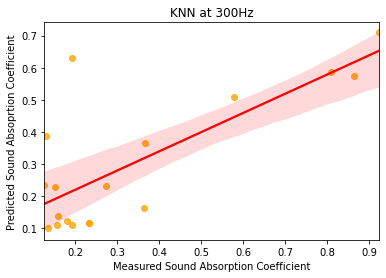

In [23]:
knn_reg = sns.regplot(x=Y_test.iloc[:,150], y=test_preds_grid[:,150], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

57